<a href="https://colab.research.google.com/github/Samiksha2602/CODE-CLAUSE-/blob/main/GOLD_PREDICTION_PROJECT_CODE_CLAUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold_data.shape

(2290, 6)

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
correlation=gold_data.corr

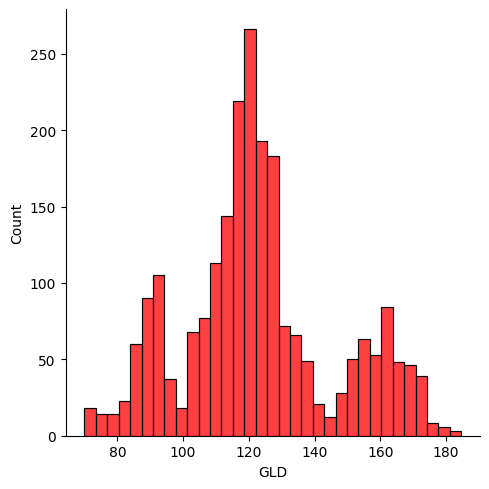

In [41]:
sns.displot(gold_data['GLD'],color='red')

In [43]:
X=gold_data.drop(['Date','GLD'],axis=1)

In [44]:
Y=gold_data['GLD']

In [45]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [47]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [48]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
regressor=RandomForestRegressor (n_estimators=100)

In [51]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [52]:
test_data_prediction= regressor.predict(X_test)

In [53]:
print(test_data_prediction)

[168.25419972  82.10689988 115.96690003 127.49500057 120.77600133
 154.84389752 150.3299988  126.07060034 117.38299879 126.07159998
 116.7376008  172.30350037 141.87829823 167.80179896 114.93070036
 116.98690033 137.38960327 169.4853011  159.3627026  156.95959978
 155.2974006  125.40250096 176.39019908 157.52940339 125.22070041
  93.70469945  77.3678001  120.62630031 119.0918993  167.3492996
  88.14380109 125.33480029  91.07330061 117.77730016 121.14399924
 136.55590091 115.59070127 115.00490077 148.35799945 107.36100062
 104.36200246  87.25899797 126.53090057 117.89399964 153.94549883
 119.52710026 108.47169958 108.1866985   93.19720082 127.04169815
  74.96340008 113.6006993  121.21660021 111.43289949 118.92109902
 120.92899938 159.37210045 167.32720108 146.88509689  85.96999843
  94.27980024  86.89029892  90.55270035 119.06210055 126.54210041
 127.53620007 167.99470038 122.34509942 117.68059861  98.46940038
 167.8311016  143.05589846 132.23830235 121.22560235 121.53009935
 119.641500

In [54]:
error_score= metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9886588808434468


In [55]:
Y_test=list(Y_test)

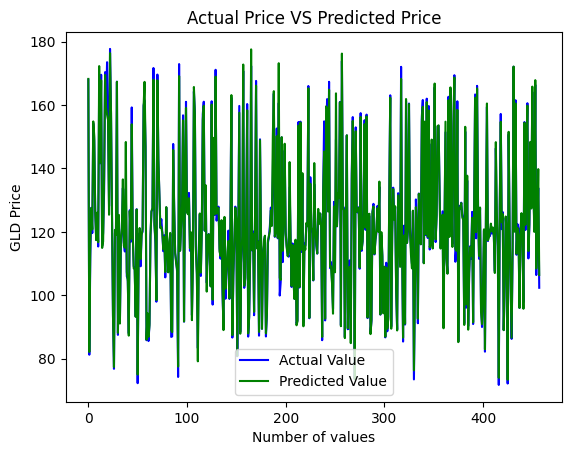

In [61]:
plt.plot(Y_test,color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green',label='Predicted Value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()